<a href="https://colab.research.google.com/github/leolaipelt/Curso_Basico_Python/blob/master/05_Seaborn_Iniciando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seaborn - Criação de Gráficos 
### Opção visualmente melhor do que o Matplotlib.
### Possui várias ferramentas já prontas de plotagem de gráficos



In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Para escolher um estilo de gráfico em seaborn utiliza o seguinte comando

sns.set(style='whitegrid', palette='pastel')

#Outro Exemplos de styles: darkgrid, whitegrid,dark,white,ticks
#Outros Exemplos de palette: deep, pastel, bright, muted, dark, colorblind.


In [0]:
cars = sns.load_dataset("mpg")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


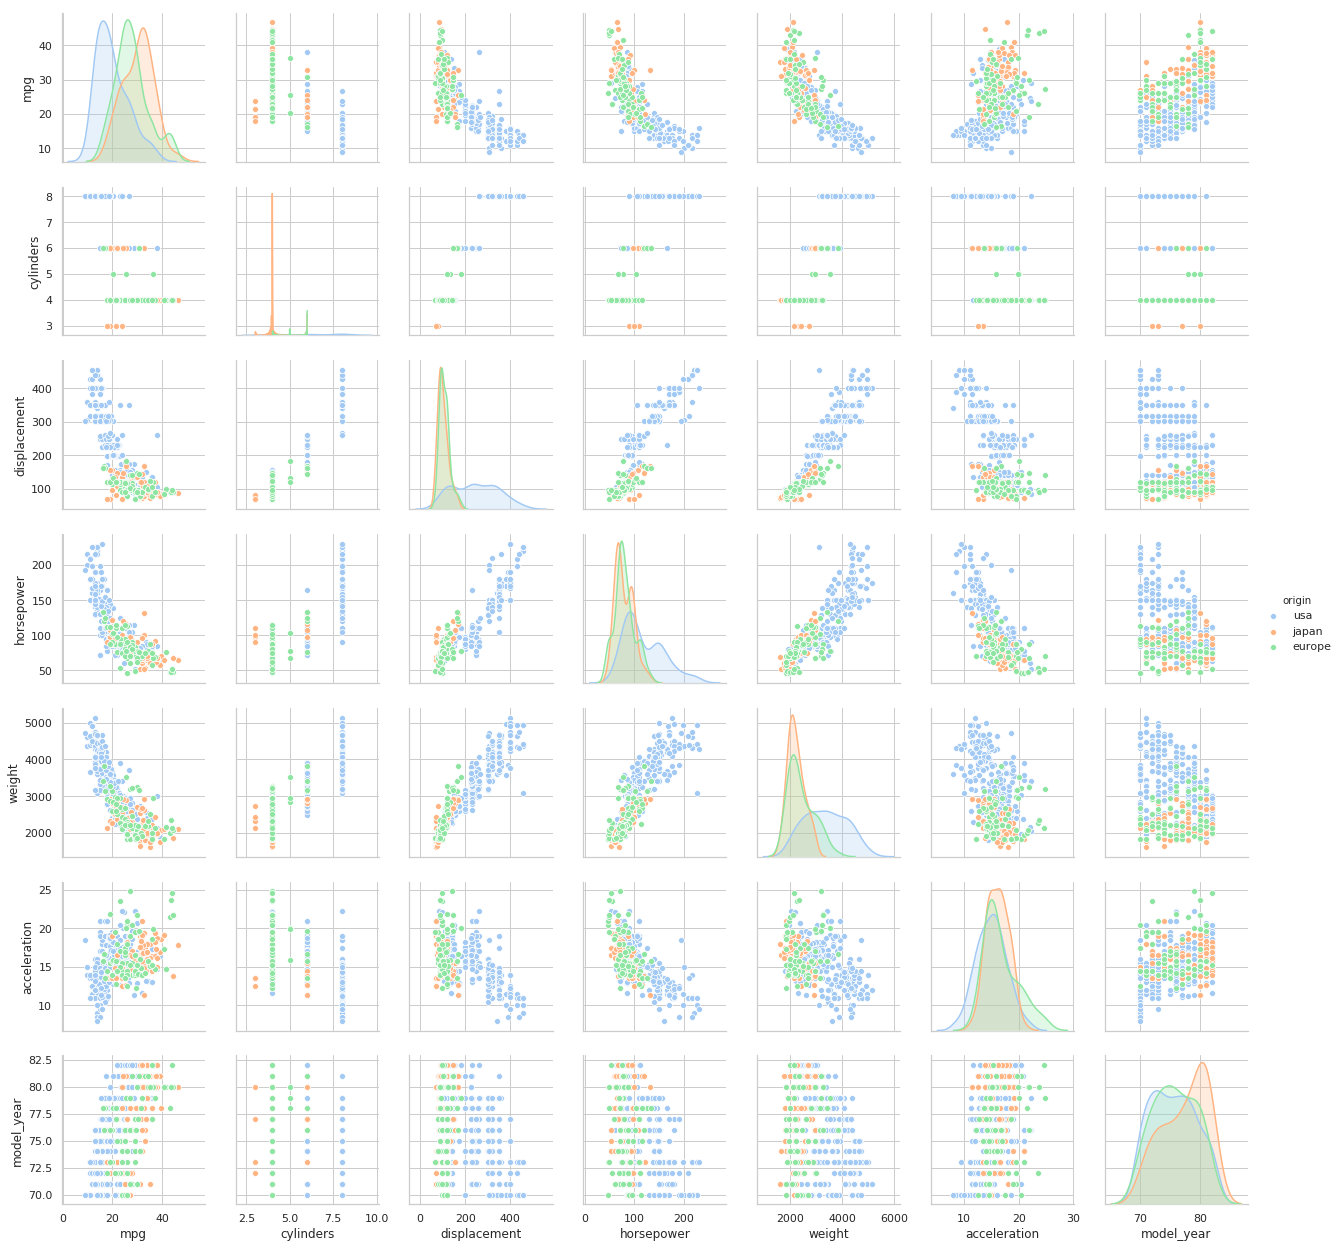

In [0]:
sns.pairplot(data=cars,hue='origin')  #arameter determines which column in the data frame should be used for colour encoding

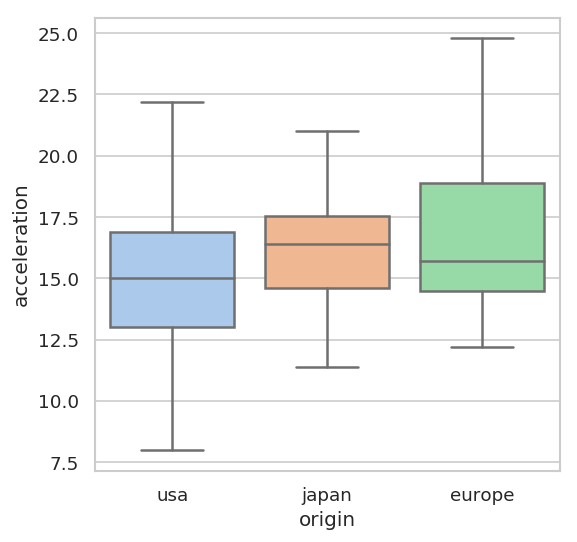

In [0]:
ax, fig = plt.subplots(1,1,figsize=(5,5), dpi=120)

sns.boxplot('origin','acceleration',data=cars)

from google.colab import files
plt.savefig('test.png')
files.download('test.png')


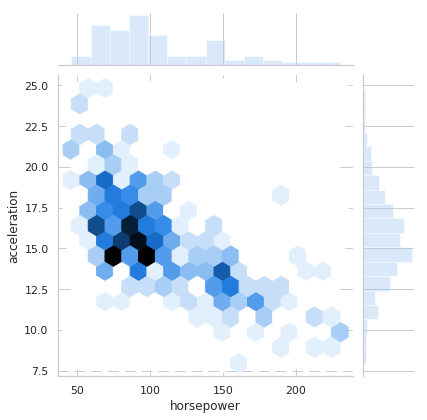

In [0]:
sns.jointplot('horsepower','acceleration',data=cars,kind='hex')

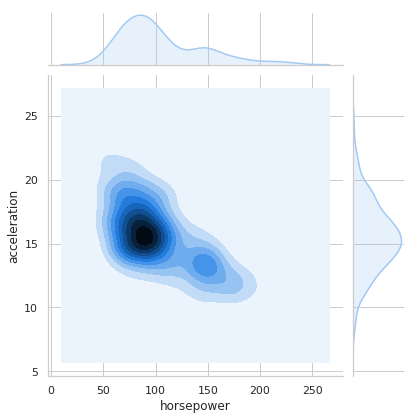

In [0]:
sns.jointplot('horsepower','acceleration',data=cars,kind='kde')

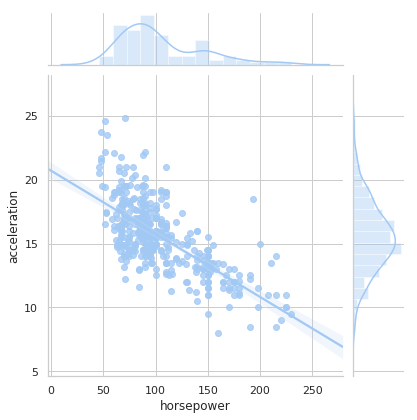

In [0]:
sns.jointplot('horsepower','acceleration',data=cars,kind='reg')

In [0]:
!pip install geopandas

In [0]:
import geopandas as gpd

fname="https://opendata.arcgis.com/datasets/063576c340a74fe29638c3b660edff92_3.geojson"

df=gpd.read_file(fname)

In [0]:
df.head()

,FID,Usuario,Finalidade,F_Ampliada,F_Conjuntu,Tipo,m³_s,Emissao,Validade,N,Regiao,UF,Municipio,Corpo_hidr,Latitude,Longitude,geometry
0,0,BIG FISH - CALJEVYZ CAPURA COMÉRCIO EXPORTAÇÃO...,OUTRAS FINALIDADES,Aquicultura,Outros,Subterrâneo,0.000133,2014-12-05T00:00:00,2018-12-04T00:00:00,353,Norte,PA,BELÉM,,-1.367806,-48.436472,POINT (-48.43685 -1.36818)
1,1,JORGE DOHARA - FAZENDA DOHARA II,AQUICULTURA,Aquicultura,Outros,Subterrâneo,0.004620,2014-10-14T00:00:00,2018-10-13T00:00:00,1247,Norte,PA,ABAETETUBA,,-1.698408,-48.836639,POINT (-48.83702 -1.69879)
2,2,LERSON WERNO SAPIRAS,Aquicultura em Tanque Escavado,Aquicultura,Outros,Subterrâneo,0.059167,2011-07-04T00:00:00,2016-07-04T00:00:00,210,Norte,RO,THEOBROMA,,-9.961583,-62.436583,POINT (-62.43704 -9.96199)
3,3,NAURELINO ALVES DE SOUZA,Aquicultura em Tanque Escavado,Aquicultura,Outros,Subterrâneo,0.022500,2011-07-06T00:00:00,2016-07-06T00:00:00,212,Norte,RO,ARIQUEMES,,-10.158194,-63.192944,POINT (-63.19340 -10.15860)
4,4,EDIR SCHLINDWEIN,Aquicultura em Tanque Escavado,Aquicultura,Outros,Subterrâneo,0.011111,2012-05-21T00:00:00,2017-05-21T00:00:00,317,Norte,RO,RIO CRESPO,,-9.566944,-62.847278,POINT (-62.84774 -9.56735)


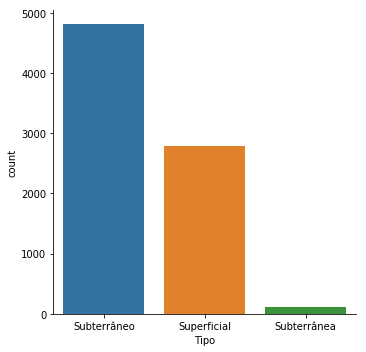

In [0]:
import seaborn as sns
sns.catplot(x='Tipo',kind='count',data=df)

In [0]:
import folium

df_RS=df[df['UF']=='RS'].reset_index()

lat=df_RS['Latitude']
lon=df_RS['Longitude']


MeuMapa=folium.Map(location=[-30,-51],zoom_start=2)
n=0
for lat_map, lon_map in zip(lat,lon):

    folium.Marker([lat_map,lon_map],
                       
                popup=df_RS['Tipo'][n],
                icon = folium.Icon(color='blue',icon='water'),  
                 
                  
               ).add_to(MeuMapa)
    n=n+1
MeuMapa

In [0]:
import geopandas as gpd

fname="https://opendata.arcgis.com/datasets/c822af8e6f4a4b259adf2d0fa66d8947_0.geojson"

df=gpd.read_file(fname)

In [0]:
import folium

MeuMapa=folium.Map(location=[-30,-51],zoom_start=2)

df_pessima=df[df['ME1IQA']<19]
df_ruim=df[(df['ME1IQA']>19) & (df['ME1IQA'] <36)]
df_regular=df[(df['ME1IQA']>36) & (df['ME1IQA'] <51)]
df_boa=df[(df['ME1IQA']>51) & (df['ME1IQA'] <79)]
df_otima=df[(df['ME1IQA']>79) & (df['ME1IQA'] <100)]



for lat_map, lon_map in zip(df_pessima['LATITUDE'],df_pessima['LONGITUDE']):
                folium.Marker([lat_map,lon_map],                      
                icon = folium.Icon(color='red',icon='water'),                     
               ).add_to(MeuMapa)

for lat_map, lon_map in zip(df_ruim['LATITUDE'],df_ruim['LONGITUDE']):
                folium.Marker([lat_map,lon_map],                      
                icon = folium.Icon(color='orange',icon='water'),                     
               ).add_to(MeuMapa)
for lat_map, lon_map in zip(df_regular['LATITUDE'],df_regular['LONGITUDE']):
                folium.Marker([lat_map,lon_map],                      
                icon = folium.Icon(color='yellow',icon='water'),                     
               ).add_to(MeuMapa)
for lat_map, lon_map in zip(df_boa['LATITUDE'],df_boa['LONGITUDE']):
                folium.Marker([lat_map,lon_map],                      
                icon = folium.Icon(color='blue',icon='water'),                     
               ).add_to(MeuMapa)
    
for lat_map, lon_map in zip(df_otima['LATITUDE'],df_otima['LONGITUDE']):
                folium.Marker([lat_map,lon_map],                      
                icon = folium.Icon(color='green',icon='water'),                     
               ).add_to(MeuMapa)
    
    
    
MeuMapa

In [0]:
df_ruim=df[(df['ME1IQA']>19) & (df['ME1IQA'] <36)]

In [0]:
df_uim

NameError: ignored